Step - 1 : Loading the dataset

In [121]:
#loading the dataset
crime_data <- read.csv("estimated_crimes_1979_2023.csv")

#displaying the first few rows
head(crime_data)

year state_abbr state_name population violent_crime homicide rape_legacy
1 1979                       220099000  1208030       21460    76390      
2 1979 AK         Alaska     406000     1994          54         292      
3 1979 AL         Alabama    3769000    15578         496       1037      
4 1979 AR         Arkansas   2180000    7984          198        595      
5 1979 AZ         Arizona    2450000    14528         219       1120      
6 1979 CA         California 22696000   184087        2952     12239      
  rape_revised robbery aggravated_assault property_crime burglary larceny
1              480700  629480             11041500       3327700  6601000
2              445     1203               23193          5616     15076  
3              4127    9918               144372         48517    83791  
4              1626    5565               70949          21457    45267  
5              4305    8884               177977         48916    116976 
6              75767   93129              1511021        496310   847148 
  motor_vehicle_theft caveats
1 1112800                    
2 2501                       
3 12064                      
4 4225                       
5 12085                      
6 167563

Step - 2: Understanding the attributes in the dataset on high level

In [122]:
# Display all column names
colnames(crime_data)


[1] "year"                "state_abbr"          "state_name"         
 [4] "population"          "violent_crime"       "homicide"           
 [7] "rape_legacy"         "rape_revised"        "robbery"            
[10] "aggravated_assault"  "property_crime"      "burglary"           
[13] "larceny"             "motor_vehicle_theft" "caveats"

Understanding each attribute in the dataset

1. year: The calender year the date corresponds to (1973, 2023)
2. state_abbr: Abbrevation to Us state
3. state_name: Full name of US state
4. population: Estimated population of the state or country for the respective year
5. violent_crime: Total no.of reported violent crimes (sum of homicide, rape, robbery, and aggravated assault)
6. Homicide: Number of reported homicides (intentional killing of another person)
7. rape_legacy: Number of reported rape cases using the legacy definition (prior to the FBI’s updated definition)
8. rape_revised: Number of reported rape cases using the revised definition (introduced in 2013).
9. robbery: Number of reported robberies (theft involving force or threat of force).
10. aggravated_assault: Number of reported aggravated assault cases (attacks intended to cause severe bodily harm)
11. property_crime: Total number of reported property crimes (sum of burglary, larceny, and motor vehicle theft)
12. burglary: Number of reported burglaries (unlawful entry into a structure to commit theft or felony)
13. larceny: Number of reported larcenies (theft of personal property without force).
14. motor_vehicle_theft: Number of reported motor vehicle thefts (stealing or attempting to steal vehicles)
15. caveats: Additional notes or disclaimers about the data. For instance, changes in definitions, underreporting, or data anomalies

Step - 3: Handling the data type descrepencies

Converts year to integer: Ensures proper formatting for chronological analysis.
Handles numeric columns: Removes commas (if any) and converts population and crime-related metrics to numeric.
Converts state-related columns to character: Ensures these columns are treated as strings.

In [123]:
library(dplyr)

crime_data <- crime_data %>%
  mutate(year = as.integer(year))

In [124]:
# Convert population and crime-related columns to numeric
numeric_columns <- c(
  "population", "violent_crime", "homicide", "rape_legacy", 
  "rape_revised", "robbery", "aggravated_assault", 
  "property_crime", "burglary", "larceny", "motor_vehicle_theft"
)

crime_data <- crime_data %>%
  mutate(across(all_of(numeric_columns), ~ as.numeric(gsub(",", "", .))))

In [125]:
# Convert state abbreviation and state name to character
crime_data <- crime_data %>%
  mutate(
    state_abbr = as.character(state_abbr),
    state_name = as.character(state_name)
  )


In [126]:
# Check the structure of the dataset after conversion
str(crime_data)

'data.frame':	2336 obs. of  15 variables:
 $ year               : int  1979 1979 1979 1979 1979 1979 1979 1979 1979 1979 ...
 $ state_abbr         : chr  "" "AK" "AL" "AR" ...
 $ state_name         : chr  "" "Alaska" "Alabama" "Arkansas" ...
 $ population         : num  2.20e+08 4.06e+05 3.77e+06 2.18e+06 2.45e+06 ...
 $ violent_crime      : num  1208030 1994 15578 7984 14528 ...
 $ homicide           : num  21460 54 496 198 219 ...
 $ rape_legacy        : num  76390 292 1037 595 1120 ...
 $ rape_revised       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ robbery            : num  480700 445 4127 1626 4305 ...
 $ aggravated_assault : num  629480 1203 9918 5565 8884 ...
 $ property_crime     : num  11041500 23193 144372 70949 177977 ...
 $ burglary           : num  3327700 5616 48517 21457 48916 ...
 $ larceny            : num  6601000 15076 83791 45267 116976 ...
 $ motor_vehicle_theft: num  1112800 2501 12064 4225 12085 ...
 $ caveats            : chr  "" "" "" "" ...


Step - 4: Handling missing values

In [127]:
# Check for missing values
missing_summary <- colSums(is.na(crime_data))
missing_percentage <- colMeans(is.na(crime_data)) * 100

In [128]:
# Print missing values and their percentages
print("Missing Values Summary:")
print(missing_summary)
print("Percentage of Missing Values:")
print(missing_percentage)

[1] "Missing Values Summary:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                 360                1768 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft             caveats 
                  0                   0                   0 
[1] "Percentage of Missing Values:"
               year          state_abbr          state_name          population 
            0.00000             0.00000             0.00000             0.00000 
      violent_crime            homicide         rape_legacy        rape_revised 
            0.00000             0.00000            15.41096            75.68493 
  

Step - 5 : Analysis on the attribute caveats

In [129]:
# Get unique values in the 'caveats' column
unique_caveats <- unique(crime_data$caveats)

# Display unique values
print("Unique values in 'caveats':")
print(unique_caveats)

[1] "Unique values in 'caveats':"
 [1] ""                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 [2] "The state UCR Program was unable to provide 1985-2013 forcible rape figures in accordance with national UCR Program guidelines.  The rape totals were estimated using national rates per 100,000 inhabitants within the eight population groups and assigning the forcible rape volumes proportionally to the state."                                                                  

In [130]:
# Replace empty strings with NA in the 'caveats' column
crime_data$caveats[crime_data$caveats == ""] <- NA

# Verify the changes
missing_caveats_count <- sum(is.na(crime_data$caveats))
print(paste("Number of missing values in 'caveats' after replacing empty strings:", missing_caveats_count))


[1] "Number of missing values in 'caveats' after replacing empty strings: 2265"


In [131]:
# Check the proportion of missing or empty values
empty_caveats_percentage <- mean(is.na(crime_data$caveats)) * 100
print(paste("Percentage of missing/empty values in 'caveats':", round(empty_caveats_percentage, 2), "%"))

[1] "Percentage of missing/empty values in 'caveats': 96.96 %"


In [132]:
# Drop the column if it has minimal or irrelevant data
if (empty_caveats_percentage > 90) {  # Adjust threshold as needed
  crime_data <- crime_data %>% select(-caveats)
  print("'caveats' column dropped due to irrelevance.")
} else {
  print("'caveats' column retained for reference.")
}

[1] "'caveats' column dropped due to irrelevance."


Step - 6: Handling all empty strings in the dataset

In [133]:
# Replace all empty strings in the dataset with NA
crime_data[crime_data == ""] <- NA

# Verify the changes
missing_summary <- colSums(is.na(crime_data))
print("Missing values after replacing empty strings:")
print(missing_summary)

[1] "Missing values after replacing empty strings:"
               year          state_abbr          state_name          population 
                  0                  41                  90                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                 360                1768 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft 
                  0                   0 


If the state name is empty then that column represents the national level data. So its good to seperate them and have timely analysis on national level data and state wise analyis on state data

Seperating the national and state related crime data for analysis

In [134]:
# Identify nation-level records
national_data <- crime_data[(
  is.na(crime_data$state_name) | 
  crime_data$state_name == "" | 
  crime_data$state_name == "United States Total"
) & is.na(crime_data$state_abbr), ]

In [135]:
# Remove these records from the original dataset
state_data <- crime_data[!(
  (is.na(crime_data$state_name) | 
   crime_data$state_name == "" | 
   crime_data$state_name == "United States Total") & 
  is.na(crime_data$state_abbr)
), ]

In [136]:
# Replace state_abbr and state_name in national_data with 'USA'
national_data$state_abbr <- "USA"
national_data$state_name <- "USA"

# Verify the changes
head(national_data[c("state_abbr", "state_name")])


state_abbr state_name
1   USA        USA       
53  USA        USA       
105 USA        USA       
157 USA        USA       
209 USA        USA       
261 USA        USA

In [137]:
# Save the datasets if needed
write.csv(national_data, "national_data.csv", row.names = FALSE)
write.csv(state_data, "state_data.csv", row.names = FALSE)

In [138]:
# Verify the separation
print(paste("Nation-level records separated:", nrow(national_data)))
print(paste("Remaining state-level records:", nrow(state_data)))

[1] "Nation-level records separated: 41"
[1] "Remaining state-level records: 2295"


AS done with dataset breakdown. Its time to clean the datasets. String with national dataset

In [139]:
# Check for missing values in the national dataset
missing_values_national <- colSums(is.na(national_data))
missing_percentage_national <- colMeans(is.na(national_data)) * 100

# Display missing values and their percentages
print("Missing Values in the National Dataset:")
print(missing_values_national)

print("Percentage of Missing Values in the National Dataset:")
print(missing_percentage_national)


[1] "Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide         rape_legacy        rape_revised 
                  0                   0                   3                  34 
            robbery  aggravated_assault      property_crime            burglary 
                  0                   0                   0                   0 
            larceny motor_vehicle_theft 
                  0                   0 
[1] "Percentage of Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
           0.000000            0.000000            0.000000            0.000000 
      violent_crime            homicide         rape_legacy        rape_revised 
           0.000000            0.000000            7.317073           82.926829 
  

Understanding more on rape legacy and rape revised attributes to handle missing values

1. Rape Legacy:
This column contains data collected using the legacy definition of rape.
It was used prior to 2013 and includes only forcible rape of a female.

2. Rape Revised:
This column contains data collected using the revised definition introduced in 2013 by the FBI.
The revised definition is broader and includes:
Rape of both males and females.
Penetration without consent, regardless of gender or force.

Years Pre-2013:
Only use rape_legacy since rape_revised will likely be missing.
Years Post-2013:
Only use rape_revised since it provides more comprehensive data.
Transition Period (Around 2013):
Use rape_revised where available, as it’s the more accurate measure.

If both columns are populated for some records:

Prefer rape_revised for analysis, as it is more inclusive and reflects modern definitions.
Optionally, create a new column that prioritizes rape_revised and uses rape_legacy as a fallback.

In [140]:
# Create a unified column for rape counts
national_data$rape <- ifelse(!is.na(national_data$rape_revised), 
                             national_data$rape_revised, 
                             national_data$rape_legacy)


In [141]:
# Drop the 'rape_legacy' and 'rape_revised' columns
national_data <- national_data %>% select(-rape_legacy, -rape_revised)

# Verify the changes
head(national_data)


year state_abbr state_name population violent_crime homicide robbery
1   1979 USA        USA        220099000  1208030       21460    480700 
53  1980 USA        USA        225349264  1344520       23040    565840 
105 1981 USA        USA        229465714  1361820       22520    592910 
157 1982 USA        USA        231664458  1322390       21010    553130 
209 1983 USA        USA        233791994  1258087       19308    506567 
261 1984 USA        USA        235824902  1273282       18692    485008 
    aggravated_assault property_crime burglary larceny motor_vehicle_theft
1   629480             11041500       3327700  6601000 1112800            
53  672650             12063700       3795200  7136900 1131700            
105 663900             12061900       3779700  7194400 1087800            
157 669480             11652000       3447100  7142500 1062400            
209 653294             10850543       3129851  6712759 1007933            
261 685349             10608473       2984434  6591874 1032165            
    rape 
1   76390
53  82990
105 82500
157 78770
209 78918
261 84233

Checking missing values after handling missing values

In [142]:
# Check for missing values in the national dataset
missing_values_national <- colSums(is.na(national_data))
missing_percentage_national <- colMeans(is.na(national_data)) * 100

# Display missing values and their percentages
print("Missing Values in the National Dataset:")
print(missing_values_national)

print("Percentage of Missing Values in the National Dataset:")
print(missing_percentage_national)


[1] "Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide             robbery  aggravated_assault 
                  0                   0                   0                   0 
     property_crime            burglary             larceny motor_vehicle_theft 
                  0                   0                   0                   0 
               rape 
                  0 
[1] "Percentage of Missing Values in the National Dataset:"
               year          state_abbr          state_name          population 
                  0                   0                   0                   0 
      violent_crime            homicide             robbery  aggravated_assault 
                  0                   0                   0                   0 
     property_crime            burglary   

All the missing values are handled in national dataset

Going onto state dataset and handling missing values

In [143]:
head(state_data)

year state_abbr state_name population violent_crime homicide rape_legacy
2 1979 AK         Alaska       406000     1994          54       292      
3 1979 AL         Alabama     3769000    15578         496      1037      
4 1979 AR         Arkansas    2180000     7984         198       595      
5 1979 AZ         Arizona     2450000    14528         219      1120      
6 1979 CA         California 22696000   184087        2952     12239      
7 1979 CO         Colorado    2772000    14472         161      1472      
  rape_revised robbery aggravated_assault property_crime burglary larceny
2 NA             445    1203                23193          5616    15076 
3 NA            4127    9918               144372         48517    83791 
4 NA            1626    5565                70949         21457    45267 
5 NA            4305    8884               177977         48916   116976 
6 NA           75767   93129              1511021        496310   847148 
7 NA            4353    8486               180984         49741   117898 
  motor_vehicle_theft
2   2501             
3  12064             
4   4225             
5  12085             
6 167563             
7  13345

In [144]:
# Check for missing values in state_data
missing_values_state <- colSums(is.na(state_data))
missing_percentage_state <- colMeans(is.na(state_data)) * 100

# Combine results into a data frame for better visualization
missing_summary <- data.frame(
  Column = names(state_data),
  Missing_Values = missing_values_state,
  Percentage_Missing = missing_percentage_state
)

# Display the summary
print("Missing Values Summary in State Data:")
print(missing_summary)

# Optionally, filter columns with missing values
columns_with_missing <- missing_summary[missing_summary$Missing_Values > 0, ]
print("Columns with Missing Values:")
print(columns_with_missing)


[1] "Missing Values Summary in State Data:"
                                 Column Missing_Values Percentage_Missing
year                               year              0           0.000000
state_abbr                   state_abbr              0           0.000000
state_name                   state_name             51           2.222222
population                   population              0           0.000000
violent_crime             violent_crime              0           0.000000
homicide                       homicide              0           0.000000
rape_legacy                 rape_legacy            357          15.555556
rape_revised               rape_revised           1734          75.555556
robbery                         robbery              0           0.000000
aggravated_assault   aggravated_assault              0           0.000000
property_crime           property_crime              0           0.000000
burglary                       burglary              0           0.0

State_name is empty handling it with the existing state_abbr and state_name mapping

In [145]:
# Create a mapping of state_abbr to state_name from existing data
state_mapping <- setNames(
  state_data$state_name[!is.na(state_data$state_name)],
  state_data$state_abbr[!is.na(state_data$state_name)]
)

# Fill missing state_name values using the mapping
state_data$state_name[is.na(state_data$state_name)] <- state_mapping[state_data$state_abbr[is.na(state_data$state_name)]]

# Verify the changes
missing_state_name_count <- sum(is.na(state_data$state_name))
print(paste("Remaining missing state_name values:", missing_state_name_count))


[1] "Remaining missing state_name values: 0"


Merging the rape_legacy and rape_revised columns 

In [146]:
# Create a unified column for rape counts
state_data$rape <- ifelse(!is.na(state_data$rape_revised), 
                             state_data$rape_revised, 
                             state_data$rape_legacy)

In [147]:
# Drop the 'rape_legacy' and 'rape_revised' columns
state_data <- state_data %>% select(-rape_legacy, -rape_revised)

# Verify the changes
head(state_data)

year state_abbr state_name population violent_crime homicide robbery
2 1979 AK         Alaska       406000     1994          54       445  
3 1979 AL         Alabama     3769000    15578         496      4127  
4 1979 AR         Arkansas    2180000     7984         198      1626  
5 1979 AZ         Arizona     2450000    14528         219      4305  
6 1979 CA         California 22696000   184087        2952     75767  
7 1979 CO         Colorado    2772000    14472         161      4353  
  aggravated_assault property_crime burglary larceny motor_vehicle_theft rape 
2  1203                23193          5616    15076    2501                292
3  9918               144372         48517    83791   12064               1037
4  5565                70949         21457    45267    4225                595
5  8884               177977         48916   116976   12085               1120
6 93129              1511021        496310   847148  167563              12239
7  8486               180984         49741   117898   13345               1472

In [148]:
# Check for missing values in state_data
missing_values_state <- colSums(is.na(state_data))
missing_percentage_state <- colMeans(is.na(state_data)) * 100

# Combine results into a data frame for better visualization
missing_summary <- data.frame(
  Column = names(state_data),
  Missing_Values = missing_values_state,
  Percentage_Missing = missing_percentage_state
)

# Display the summary
print("Missing Values Summary in State Data:")
print(missing_summary)

# Optionally, filter columns with missing values
columns_with_missing <- missing_summary[missing_summary$Missing_Values > 0, ]
print("Columns with Missing Values:")
print(columns_with_missing)

[1] "Missing Values Summary in State Data:"
                                 Column Missing_Values Percentage_Missing
year                               year              0                  0
state_abbr                   state_abbr              0                  0
state_name                   state_name              0                  0
population                   population              0                  0
violent_crime             violent_crime              0                  0
homicide                       homicide              0                  0
robbery                         robbery              0                  0
aggravated_assault   aggravated_assault              0                  0
property_crime           property_crime              0                  0
burglary                       burglary              0                  0
larceny                         larceny              0                  0
motor_vehicle_theft motor_vehicle_theft              0              

All the missing values are handled in state data
next step "     Alabama" need to remove extra spaces

In [149]:
# Remove leading and trailing spaces from 'state_name'
state_data$state_name <- trimws(state_data$state_name)

# Verify the changes
head(state_data$state_name)

[1] "Alaska"     "Alabama"    "Arkansas"   "Arizona"    "California"
[6] "Colorado"

saving the state_data as file to check the cleaned reseults

In [150]:
write.csv(state_data, "state_data_cleaned.csv", row.names = FALSE)

Done all issues are cleared


Normalization is a crucial step to ensure that crime data is comparable across states and years. By calculating crime rates per 100,000 population, you standardize the data, allowing for fair comparisons regardless of population differences.

In [151]:
# Define columns to normalize
crime_columns <- c(
  'violent_crime', 'homicide', 'rape', 
  'robbery', 'aggravated_assault', 'property_crime',
  'burglary', 'larceny', 'motor_vehicle_theft'
)

# Normalize national data
for (col in crime_columns) {
  national_data[[paste0(col, "_rate")]] <- (national_data[[col]] / national_data$population) * 100000
}

# Normalize state data
for (col in crime_columns) {
  state_data[[paste0(col, "_rate")]] <- (state_data[[col]] / state_data$population) * 100000
}

# Verify normalization
head(national_data)
head(state_data)


year state_abbr state_name population violent_crime homicide robbery
1   1979 USA        USA        220099000  1208030       21460    480700 
53  1980 USA        USA        225349264  1344520       23040    565840 
105 1981 USA        USA        229465714  1361820       22520    592910 
157 1982 USA        USA        231664458  1322390       21010    553130 
209 1983 USA        USA        233791994  1258087       19308    506567 
261 1984 USA        USA        235824902  1273282       18692    485008 
    aggravated_assault property_crime burglary ⋯ rape  violent_crime_rate
1   629480             11041500       3327700  ⋯ 76390 548.8576          
53  672650             12063700       3795200  ⋯ 82990 596.6383          
105 663900             12061900       3779700  ⋯ 82500 593.4743          
157 669480             11652000       3447100  ⋯ 78770 570.8213          
209 653294             10850543       3129851  ⋯ 78918 538.1224          
261 685349             10608473       2984434  ⋯ 84233 539.9269          
    homicide_rate rape_rate robbery_rate aggravated_assault_rate
1    9.750158     34.70711  218.4017     285.9986               
53  10.224129     36.82728  251.0947     298.4922               
105  9.814102     35.95308  258.3872     289.3243               
157  9.069151     34.00176  238.7634     288.9869               
209  8.258623     33.75565  216.6742     279.4339               
261  7.926220     35.71845  205.6645     290.6177               
    property_crime_rate burglary_rate larceny_rate motor_vehicle_theft_rate
1   5016.606            1511.911      2999.105     505.5907                
53  5353.335            1684.141      3167.039     502.1982                
105 5256.515            1647.174      3135.283     474.0577                
157 5029.688            1487.971      3083.123     458.5943                
209 4641.110            1338.733      2871.253     431.1238                
261 4498.453            1265.530      2795.241     437.6828

year state_abbr state_name population violent_crime homicide robbery
2 1979 AK         Alaska       406000     1994          54       445  
3 1979 AL         Alabama     3769000    15578         496      4127  
4 1979 AR         Arkansas    2180000     7984         198      1626  
5 1979 AZ         Arizona     2450000    14528         219      4305  
6 1979 CA         California 22696000   184087        2952     75767  
7 1979 CO         Colorado    2772000    14472         161      4353  
  aggravated_assault property_crime burglary ⋯ rape  violent_crime_rate
2  1203                23193          5616   ⋯   292 491.1330          
3  9918               144372         48517   ⋯  1037 413.3192          
4  5565                70949         21457   ⋯   595 366.2385          
5  8884               177977         48916   ⋯  1120 592.9796          
6 93129              1511021        496310   ⋯ 12239 811.0989          
7  8486               180984         49741   ⋯  1472 522.0779          
  homicide_rate rape_rate robbery_rate aggravated_assault_rate
2 13.300493     71.92118  109.60591    296.3054               
3 13.159989     27.51393  109.49854    263.1467               
4  9.082569     27.29358   74.58716    255.2752               
5  8.938776     45.71429  175.71429    362.6122               
6 13.006697     53.92580  333.83416    410.3322               
7  5.808081     53.10245  157.03463    306.1328               
  property_crime_rate burglary_rate larceny_rate motor_vehicle_theft_rate
2 5712.562            1383.2512     3713.300     616.0099                
3 3830.512            1287.2645     2223.163     320.0849                
4 3254.541             984.2661     2076.468     193.8073                
5 7264.367            1996.5714     4774.531     493.2653                
6 6657.653            2186.7730     3732.587     738.2931                
7 6529.004            1794.4084     4253.175     481.4214

Done with all data cleaning and normalization. now the data is ready for visualization and analysis

EDA - National data

Trend Analysis: Crime Rates Over Time - plot trends for all crime types over time

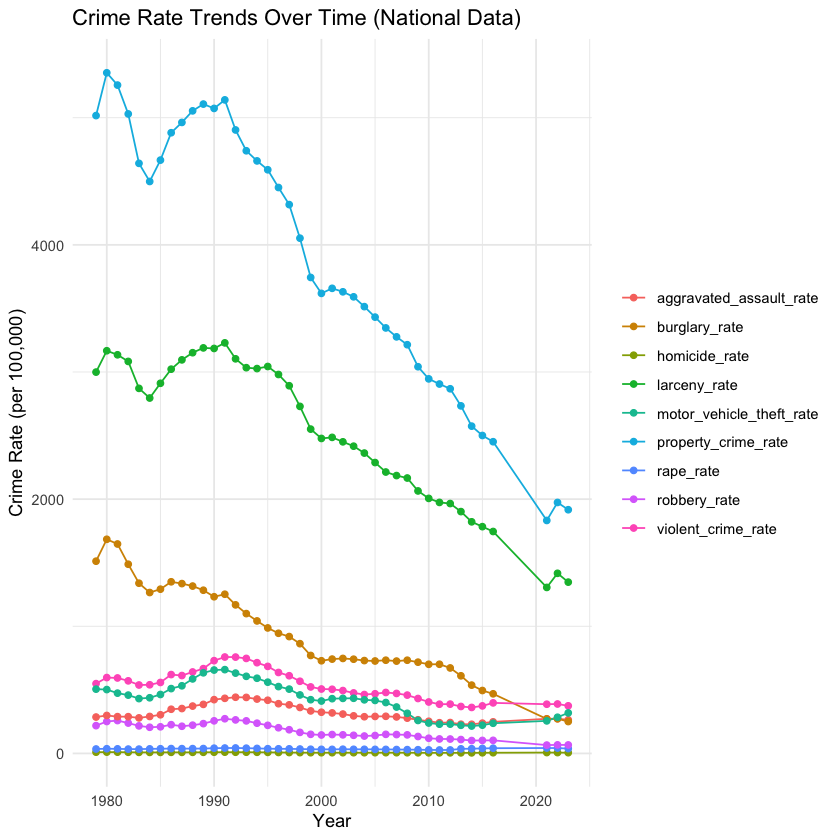

In [152]:
library(ggplot2)
library(tidyr)

# Reshape data for easier plotting
crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)
national_long <- national_data %>%
  select(year, all_of(crime_rate_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "crime_rate")

# Plot trends for all crime types
ggplot(national_long, aes(x = year, y = crime_rate, color = crime_type)) +
  geom_line() +
  geom_point() +
  ggtitle("Crime Rate Trends Over Time (National Data)") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(legend.title = element_blank())


years with the highest and lowest crime rates for each crime type.

In [153]:
# Find the year with the highest and lowest crime rates for each crime type
key_metrics <- lapply(crime_rate_columns, function(crime) {
  data.frame(
    Crime_Type = crime,
    Max_Year = national_data$year[which.max(national_data[[crime]])],
    Max_Value = max(national_data[[crime]], na.rm = TRUE),
    Min_Year = national_data$year[which.min(national_data[[crime]])],
    Min_Value = min(national_data[[crime]], na.rm = TRUE)
  )
})

# Combine results into a single data frame
key_metrics_df <- do.call(rbind, key_metrics)
print(key_metrics_df)


                Crime_Type Max_Year  Max_Value Min_Year   Min_Value
1       violent_crime_rate     1991  758.17710     2014  361.553854
2            homicide_rate     1980   10.22413     2014    4.441415
3                rape_rate     1992   42.76443     2011   27.014856
4             robbery_rate     1991  272.74383     2021   65.520881
5  aggravated_assault_rate     1992  441.89912     2014  229.248051
6      property_crime_rate     1980 5353.33455     2021 1832.318021
7            burglary_rate     1980 1684.14129     2023  250.679505
8             larceny_rate     1991 3229.08116     2021 1305.527727
9 motor_vehicle_theft_rate     1991  659.01948     2014  215.361261


correlations between population and each crime rate and visualizes relationships.

                                       Crime_Type Correlation
violent_crime_rate             violent_crime_rate  -0.7862643
homicide_rate                       homicide_rate  -0.8517171
rape_rate                               rape_rate  -0.2046159
robbery_rate                         robbery_rate  -0.9226853
aggravated_assault_rate   aggravated_assault_rate  -0.5525863
property_crime_rate           property_crime_rate  -0.9689658
burglary_rate                       burglary_rate  -0.9674821
larceny_rate                         larceny_rate  -0.9437038
motor_vehicle_theft_rate motor_vehicle_theft_rate  -0.7973006


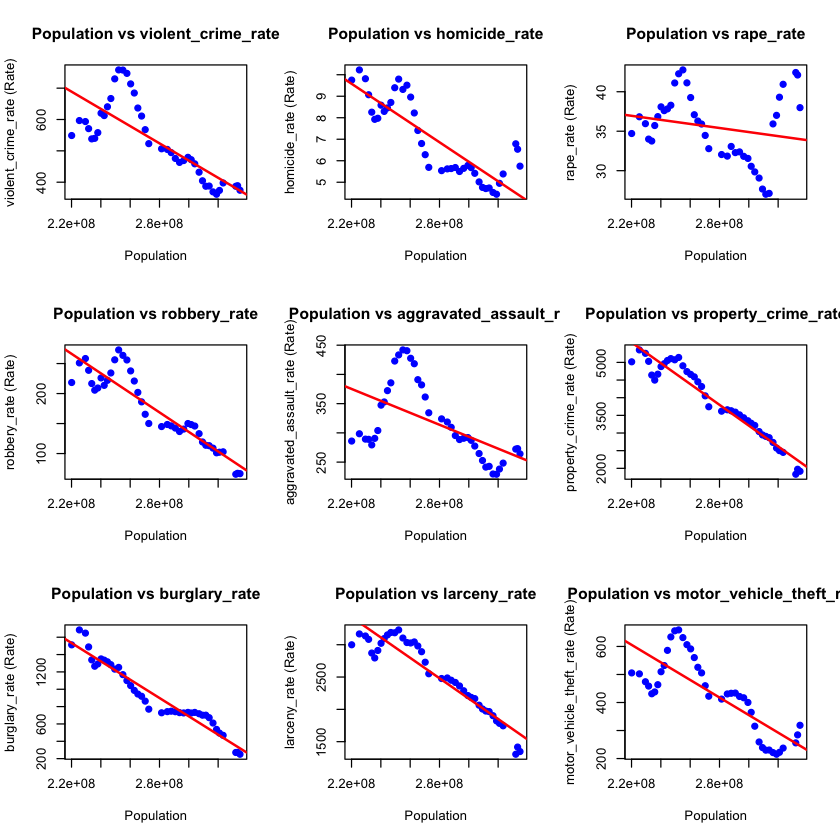

In [154]:
# Compute correlations
correlations <- sapply(crime_rate_columns, function(crime) {
  cor(national_data$population, national_data[[crime]], use = "complete.obs")
})
correlations_df <- data.frame(Crime_Type = crime_rate_columns, Correlation = correlations)
print(correlations_df)

# Visualize relationships with scatter plots
par(mfrow = c(3, 3))  # Set up a grid for multiple plots
for (crime in crime_rate_columns) {
  plot(national_data$population, national_data[[crime]],
       main = paste("Population vs", crime),
       xlab = "Population",
       ylab = paste(crime, "(Rate)"),
       pch = 19, col = "blue")
  abline(lm(national_data[[crime]] ~ national_data$population), col = "red", lwd = 2)  # Add trendline
}
par(mfrow = c(1, 1))  # Reset grid layout


Distribution Analysis - distribution of crime rates across years for each crime type

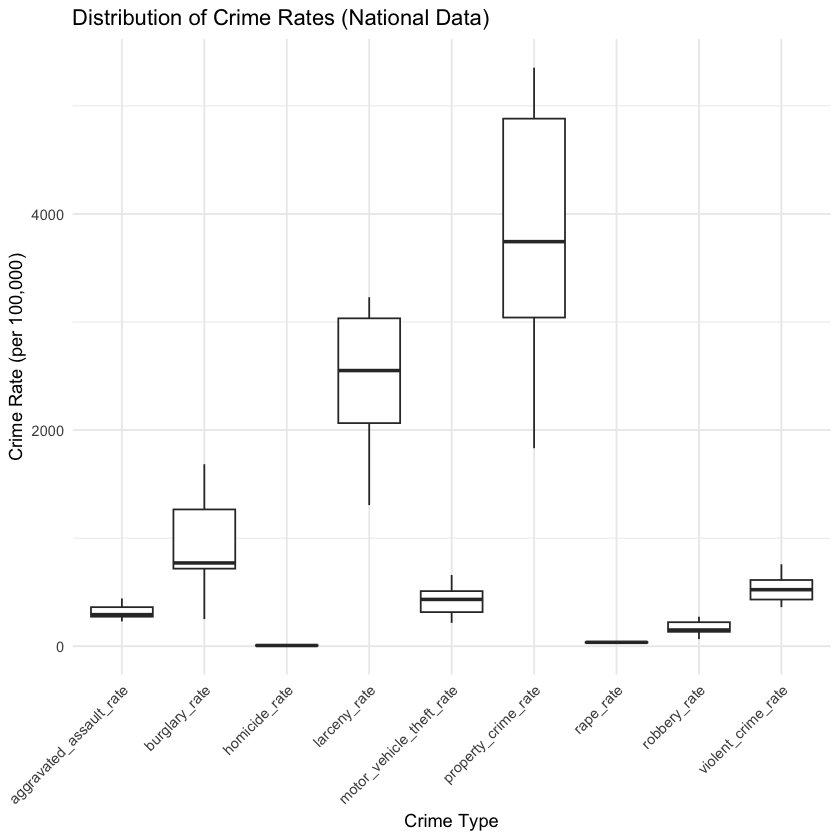

In [155]:
# Boxplot for each crime type
library(ggplot2)

crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)
national_long <- national_data %>%
  select(year, all_of(crime_rate_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "crime_rate")

ggplot(national_long, aes(x = crime_type, y = crime_rate)) +
  geom_boxplot() +
  ggtitle("Distribution of Crime Rates (National Data)") +
  xlab("Crime Type") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


trend decomposition for all crime types using time series analysis 

In [156]:
install.packages("forecast")

Warning message in install.packages("forecast"):
“installation of package ‘forecast’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [157]:
# # Load necessary library
# library(forecast)

# # List of crime rate columns
# crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)

# # Loop through each crime type and perform decomposition
# for (crime in crime_rate_columns) {
#   # Create a time series object
#   crime_ts <- ts(national_data[[crime]], start = min(national_data$year), frequency = 1)
  
#   # Decompose the time series
#   crime_decomp <- decompose(crime_ts, type = "additive")
  
#   # Plot the decomposition
#   print(paste("Decomposition of", crime))
#   plot(crime_decomp)
# }


crime rates change from one year to the next

In [158]:
# # List of crime rate columns
# crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)

# # Calculate Year-over-Year (YoY) changes
# national_data_yoy <- national_data %>%
#   mutate(across(all_of(crime_rate_columns), ~ . - lag(.), .names = "yoy_{.col}"))

# # View the first few rows of the YoY changes
# head(national_data_yoy)

# # Find the years with the largest increases and decreases for each crime type
# yoy_summary <- lapply(crime_rate_columns, function(crime) {
#   data.frame(
#     Crime_Type = crime,
#     Max_Year = national_data_yoy$year[which.max(national_data_yoy[[paste0("yoy_", crime)]], na.rm = TRUE)],
#     Max_Change = max(national_data_yoy[[paste0("yoy_", crime)]], na.rm = TRUE),
#     Min_Year = national_data_yoy$year[which.min(national_data_yoy[[paste0("yoy_", crime)]], na.rm = TRUE)],
#     Min_Change = min(national_data_yoy[[paste0("yoy_", crime)]], na.rm = TRUE)
#   )
# })

# # Combine results into a single data frame
# yoy_summary_df <- do.call(rbind, yoy_summary)

# # Display the summary of largest YoY changes
# print(yoy_summary_df)


the proportion of each crime type to the total crime rates over time

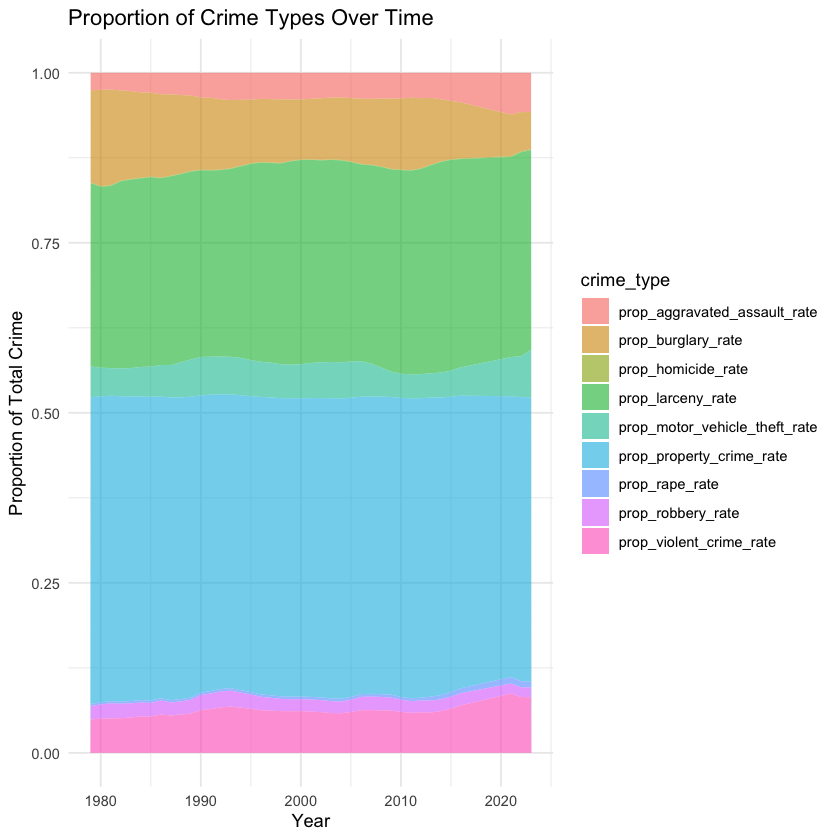

In [159]:
# Calculate proportions of each crime type
national_data <- national_data %>%
  mutate(total_crime_rate = rowSums(select(., all_of(crime_rate_columns)), na.rm = TRUE)) %>%
  mutate(across(all_of(crime_rate_columns), ~ ./total_crime_rate, .names = "prop_{.col}"))

# Plot proportions over time
crime_prop_columns <- grep("^prop_", names(national_data), value = TRUE)
national_prop_long <- national_data %>%
  select(year, all_of(crime_prop_columns)) %>%
  pivot_longer(cols = -year, names_to = "crime_type", values_to = "proportion")

ggplot(national_prop_long, aes(x = year, y = proportion, fill = crime_type)) +
  geom_area(alpha = 0.6) +
  ggtitle("Proportion of Crime Types Over Time") +
  xlab("Year") +
  ylab("Proportion of Total Crime") +
  theme_minimal()


Identify any anomalies or outliers in crime rates

# A tibble: 0 × 3
# Groups:   crime_type [0]
# ℹ 3 variables: year <int>, crime_type <chr>, crime_rate <dbl>


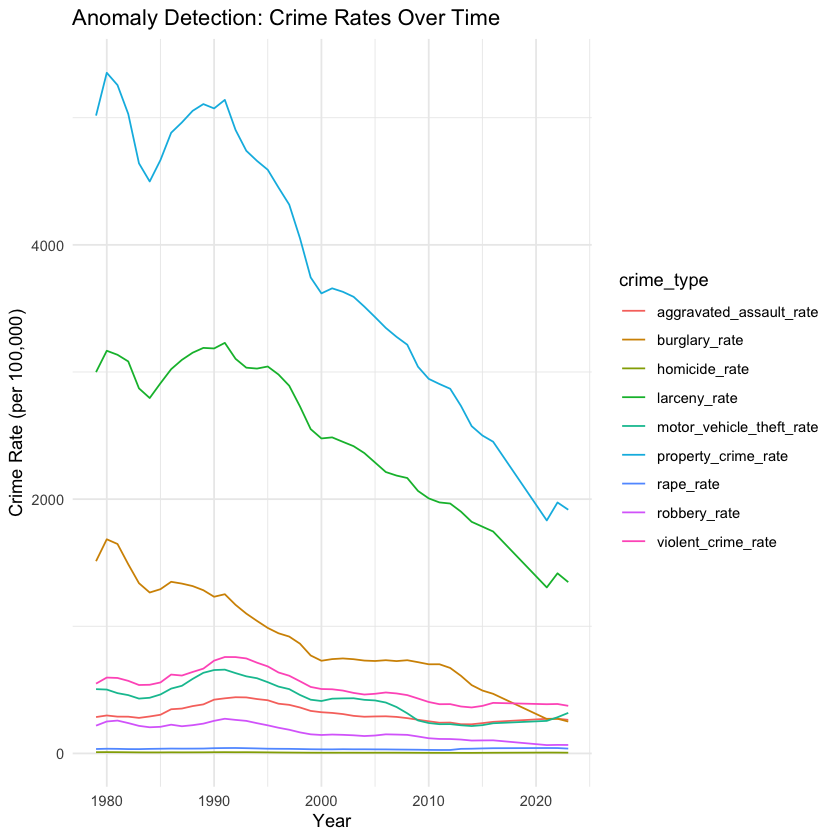

In [160]:
# Load necessary library
library(dplyr)
library(ggplot2)

# Identify outliers for each crime type using IQR
crime_rate_columns <- grep("_rate$", names(national_data), value = TRUE)
outliers <- national_long %>%
  group_by(crime_type) %>%
  filter(crime_rate > (quantile(crime_rate, 0.75) + 1.5 * IQR(crime_rate)) |
           crime_rate < (quantile(crime_rate, 0.25) - 1.5 * IQR(crime_rate)))

# View identified outliers
print(outliers)

# Visualize the outliers
ggplot(national_long, aes(x = year, y = crime_rate, color = crime_type)) +
  geom_line() +
  geom_point(data = outliers, aes(x = year, y = crime_rate), color = "red", size = 2) +
  ggtitle("Anomaly Detection: Crime Rates Over Time") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


Crime Rate Predictions (Optional)
Fit predictive models to forecast future crime rates

In [161]:
# Linear regression to predict violent crime rate
lm_model <- lm(violent_crime_rate ~ year, data = national_data)
summary(lm_model)

# Predict future crime rates
future_years <- data.frame(year = seq(max(national_data$year) + 1, max(national_data$year) + 10))
predictions <- predict(lm_model, newdata = future_years)

# Combine predictions with future years
future_predictions <- data.frame(future_years, predicted_crime_rate = predictions)
print(future_predictions)



Call:
lm(formula = violent_crime_rate ~ year, data = national_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-131.30  -51.04  -12.02   26.25  172.59 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15154.3665  1996.8936   7.589 3.38e-09 ***
year           -7.3139     0.9988  -7.323 7.75e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78.9 on 39 degrees of freedom
Multiple R-squared:  0.5789,	Adjusted R-squared:  0.5681 
F-statistic: 53.62 on 1 and 39 DF,  p-value: 7.755e-09


   year predicted_crime_rate
1  2024             351.0306
2  2025             343.7167
3  2026             336.4028
4  2027             329.0889
5  2028             321.7750
6  2029             314.4611
7  2030             307.1472
8  2031             299.8333
9  2032             292.5194
10 2033             285.2055


EDA - State data

Analyze crime trends across states and years

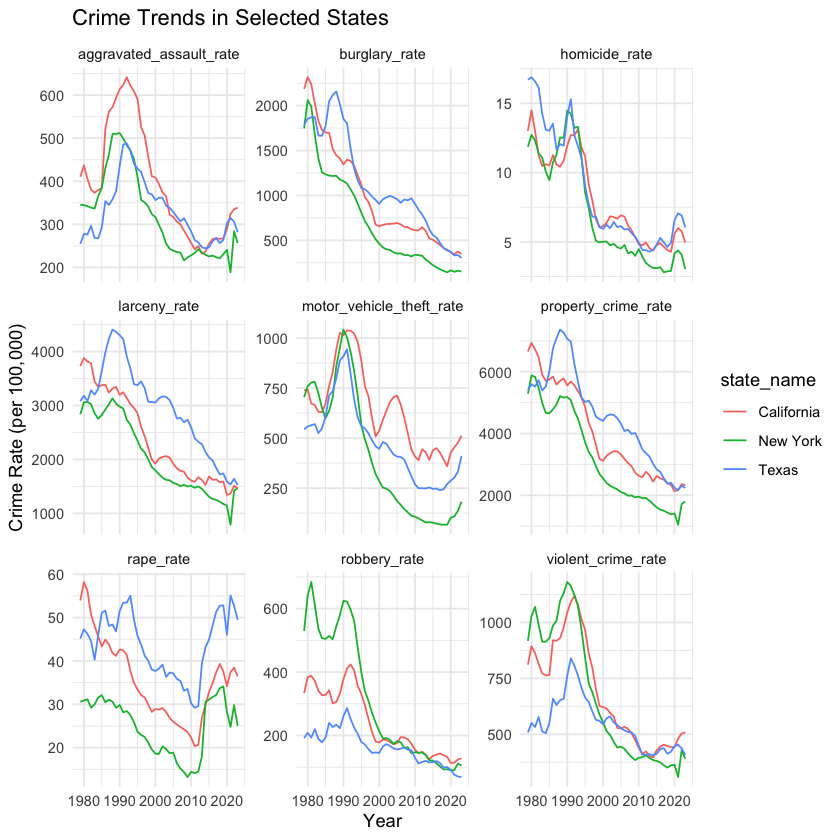

In [162]:
# Load necessary library
library(ggplot2)

# Select a few states for comparison
selected_states <- c("California", "Texas", "New York")

# Filter data for selected states
state_trends <- state_data %>%
  filter(state_name %in% selected_states) %>%
  pivot_longer(cols = ends_with("_rate"), names_to = "crime_type", values_to = "crime_rate")

# Plot trends for selected states
ggplot(state_trends, aes(x = year, y = crime_rate, color = state_name)) +
  geom_line() +
  facet_wrap(~ crime_type, scales = "free_y") +
  ggtitle("Crime Trends in Selected States") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


Compare average crime rates across states to identify high-crime and low-crime states

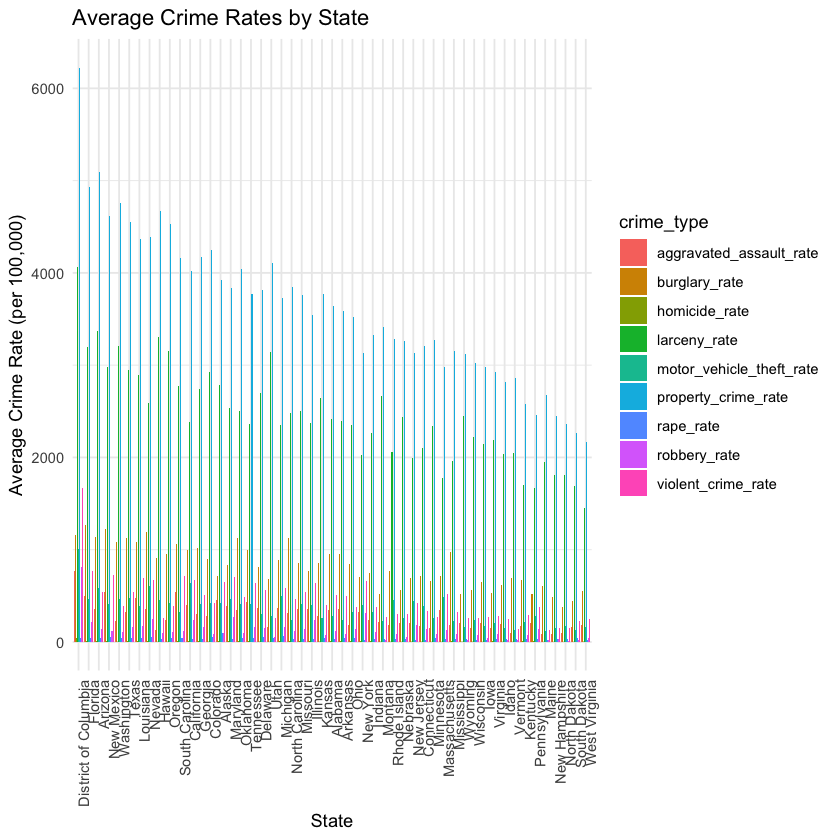

In [163]:
# Calculate average crime rates by state
state_avg_crime <- state_data %>%
  group_by(state_name) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))

# Reshape data for plotting
state_avg_long <- state_avg_crime %>%
  pivot_longer(cols = -state_name, names_to = "crime_type", values_to = "avg_crime_rate")

# Bar plot of average crime rates by state
ggplot(state_avg_long, aes(x = reorder(state_name, -avg_crime_rate), y = avg_crime_rate, fill = crime_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  ggtitle("Average Crime Rates by State") +
  xlab("State") +
  ylab("Average Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))


Understand the distribution of crime rates across states for each year

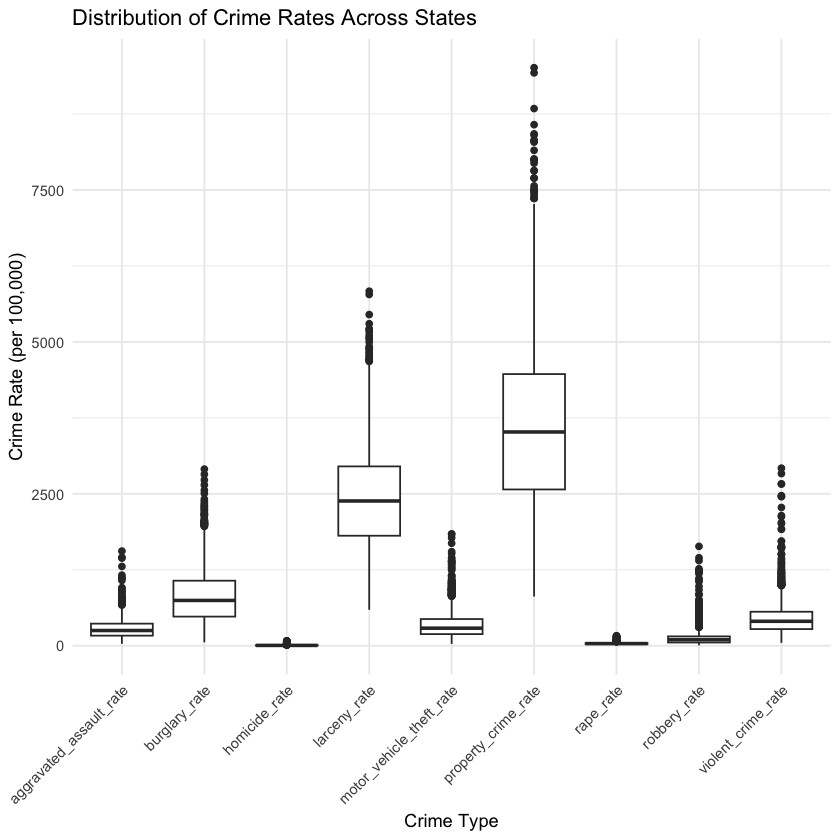

In [164]:
# Reshape data for distribution analysis
state_long <- state_data %>%
  pivot_longer(cols = ends_with("_rate"), names_to = "crime_type", values_to = "crime_rate")

# Box plot of crime rate distributions
ggplot(state_long, aes(x = crime_type, y = crime_rate)) +
  geom_boxplot() +
  ggtitle("Distribution of Crime Rates Across States") +
  xlab("Crime Type") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


dentify states or years with unusually high or low crime rates

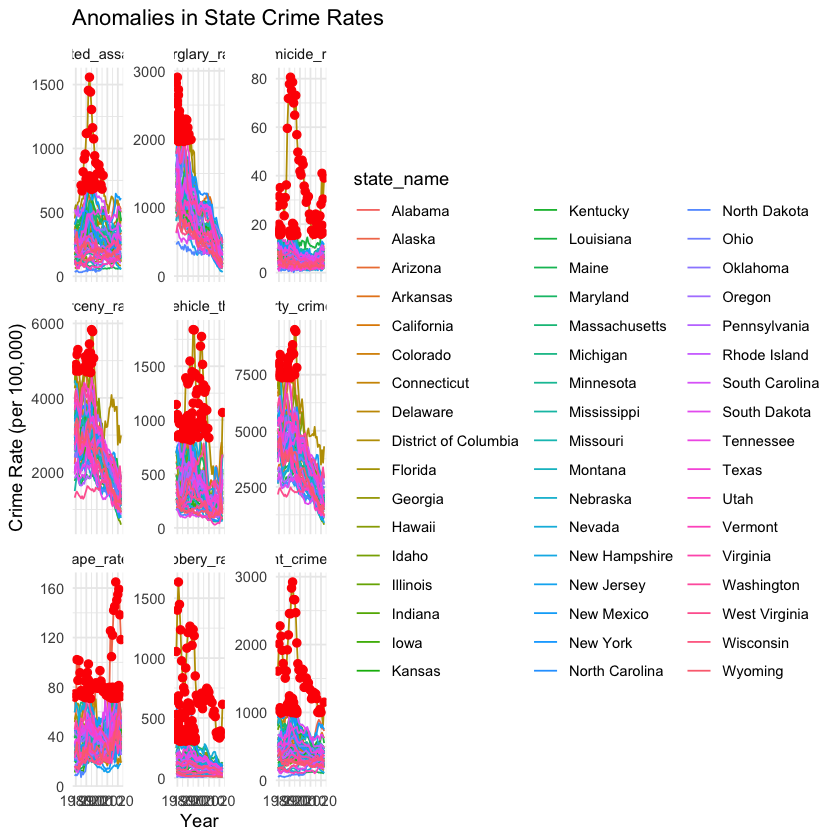

In [165]:
# Detect anomalies using IQR method
state_outliers <- state_long %>%
  group_by(crime_type) %>%
  filter(crime_rate > (quantile(crime_rate, 0.75) + 1.5 * IQR(crime_rate)) |
           crime_rate < (quantile(crime_rate, 0.25) - 1.5 * IQR(crime_rate)))

# Visualize outliers
ggplot(state_long, aes(x = year, y = crime_rate, color = state_name)) +
  geom_line() +
  geom_point(data = state_outliers, aes(x = year, y = crime_rate), color = "red", size = 2) +
  facet_wrap(~ crime_type, scales = "free_y") +
  ggtitle("Anomalies in State Crime Rates") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


Corelation analysis - Analyze relationships between crime types at the state level

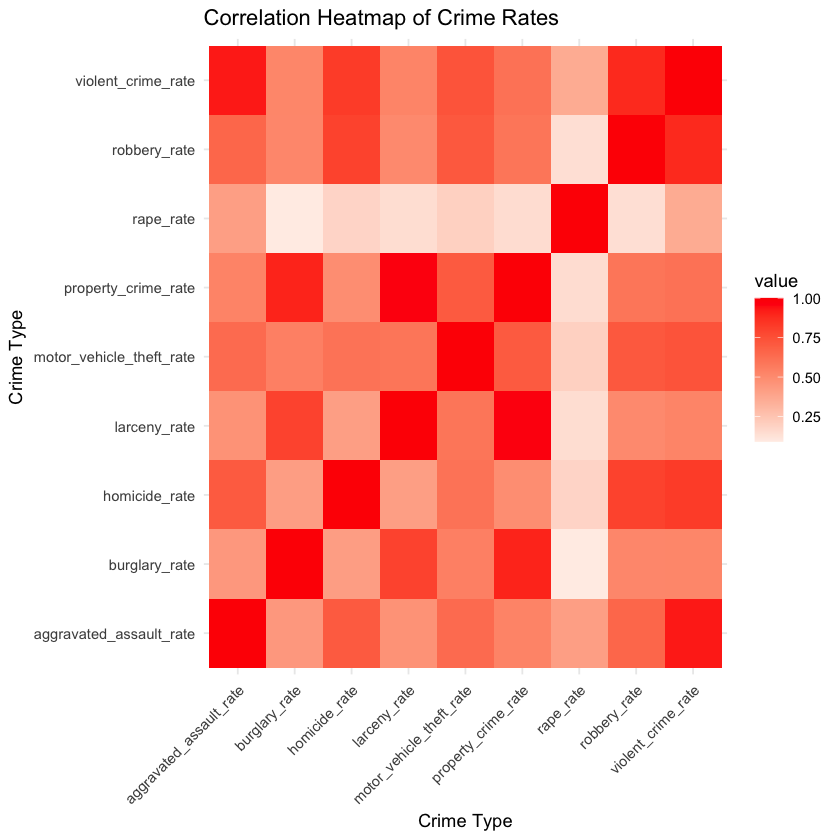

In [166]:
# Load necessary libraries
library(tidyverse)

# Compute pairwise correlations for crime rates
cor_matrix <- state_data %>%
  select(ends_with("_rate")) %>%
  cor(use = "complete.obs") %>%
  as_tibble(rownames = "Var1")

# Reshape the correlation matrix into a long format using pivot_longer
cor_long <- cor_matrix %>%
  pivot_longer(cols = -Var1, names_to = "Var2", values_to = "value")

# Visualize the correlation matrix
ggplot(cor_long, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  ggtitle("Correlation Heatmap of Crime Rates") +
  xlab("Crime Type") +
  ylab("Crime Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


State and national data comparison

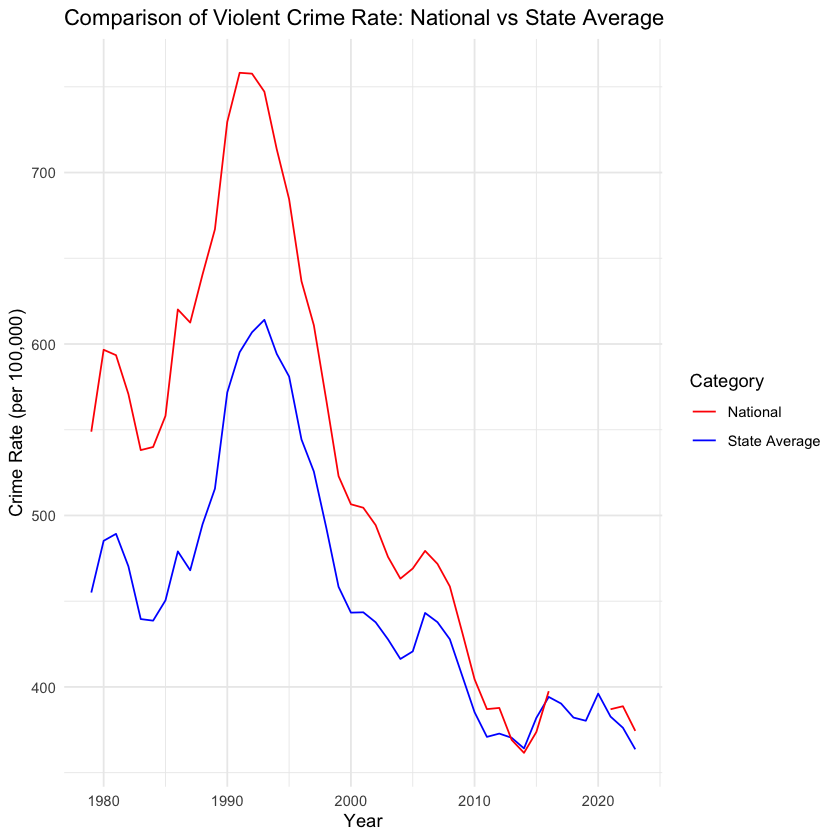

In [167]:
# Aggregate state-level data by year
state_aggregated <- state_data %>%
  group_by(year) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))

# Merge with national data for comparison
comparison <- state_aggregated %>%
  rename_with(~ paste0("state_avg_", .), -year) %>%
  left_join(national_data, by = "year")

# Visualize comparison for violent crime rate
ggplot(comparison, aes(x = year)) +
  geom_line(aes(y = state_avg_violent_crime_rate, color = "State Average")) +
  geom_line(aes(y = violent_crime_rate, color = "National")) +
  ggtitle("Comparison of Violent Crime Rate: National vs State Average") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal() +
  scale_color_manual(name = "Category", values = c("State Average" = "blue", "National" = "red"))


The graph illustrates the comparison of violent crime rates between national-level data and state averages over time. Both trends exhibit a significant peak in the late 1980s to early 1990s, with the national rate consistently exceeding the state average during this period, likely due to certain high-crime states disproportionately influencing the national aggregate. Following the peak, there is a steady decline in violent crime rates for both measures, reflecting broader societal, economic, and policing changes post-1990. Notably, after 2010, the national and state averages converge, suggesting reduced disparities in crime rates across states and a more uniform national trend. The state average exhibits slightly greater fluctuations in earlier years, potentially reflecting variability in smaller or less populous states. Overall, the graph highlights the evolving nature of violent crime rates, with convergence in recent years pointing to possible improvements in nationwide crime prevention efforts.

 deeper into crime trends across different regions (e.g., Midwest, Northeast).

`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


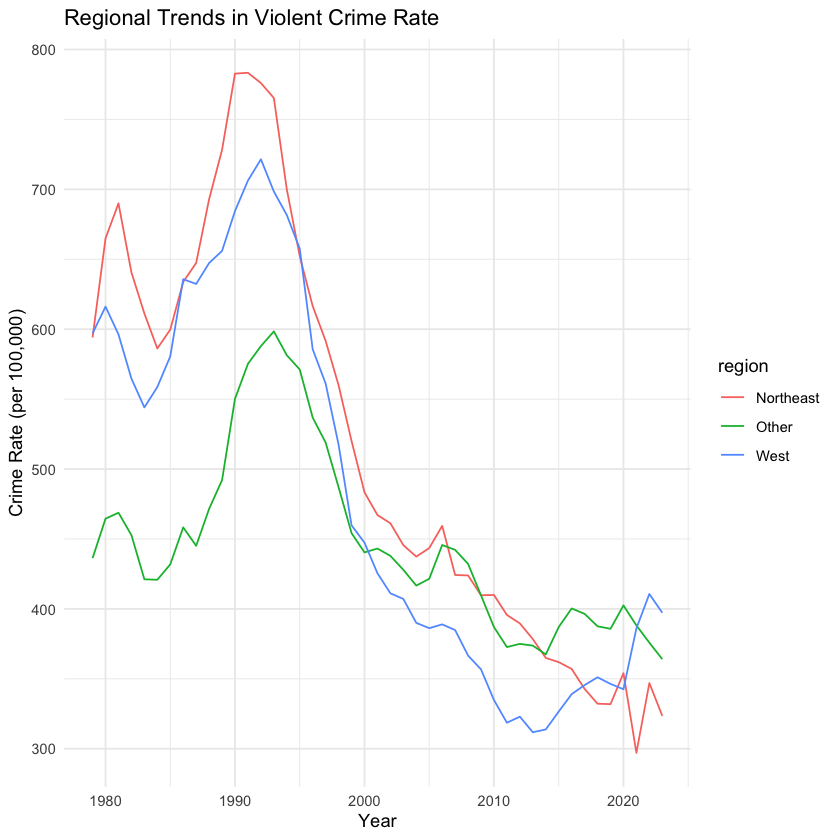

In [168]:
# Example region assignment (update with actual regions)
state_data <- state_data %>%
  mutate(region = case_when(
    state_name %in% c("California", "Oregon", "Washington") ~ "West",
    state_name %in% c("New York", "Pennsylvania", "Massachusetts") ~ "Northeast",
    TRUE ~ "Other"
  ))

# Aggregate data by region and year
regional_trends <- state_data %>%
  group_by(region, year) %>%
  summarize(across(ends_with("_rate"), mean, na.rm = TRUE))

# Visualize regional trends for violent crime rate
ggplot(regional_trends, aes(x = year, y = violent_crime_rate, color = region)) +
  geom_line() +
  ggtitle("Regional Trends in Violent Crime Rate") +
  xlab("Year") +
  ylab("Crime Rate (per 100,000)") +
  theme_minimal()


The graph highlights regional trends in violent crime rates, with the Northeast experiencing the highest rates during the late 1980s and early 1990s, followed by the West and the "Other" regions. All regions show a significant decline in crime rates post-1990, with narrowing differences and a convergence in trends by the mid-2000s. While the Northeast initially had the highest rates, post-2010, the West consistently exhibits the lowest crime rates among the regions, and variability across regions decreases. This convergence suggests a nationwide reduction in violent crime influenced by uniform trends across regions, though some regional differences persist, likely shaped by varying policies, demographics, and socioeconomic factors.

Perform a t-test to determine if there is a significant difference in the violent crime rates between two specific regions, such as the Northeast and the West.

[1] "Shapiro-Wilk Test for Northeast:"

	Shapiro-Wilk normality test

data:  northeast
W = 0.80292, p-value = 3.46e-12

[1] "Shapiro-Wilk Test for West:"

	Shapiro-Wilk normality test

data:  west
W = 0.84768, p-value = 1.709e-10



Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


[1] "Levene's Test for Homogeneity of Variances:"
Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  0.1028 0.7487
      268               
[1] "Two-Sample t-Test Result:"



	Two Sample t-test

data:  northeast and west
t = 1.3304, df = 268, p-value = 0.1845
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16.67809  86.18626
sample estimates:
mean of x mean of y 
 517.2886  482.5345 



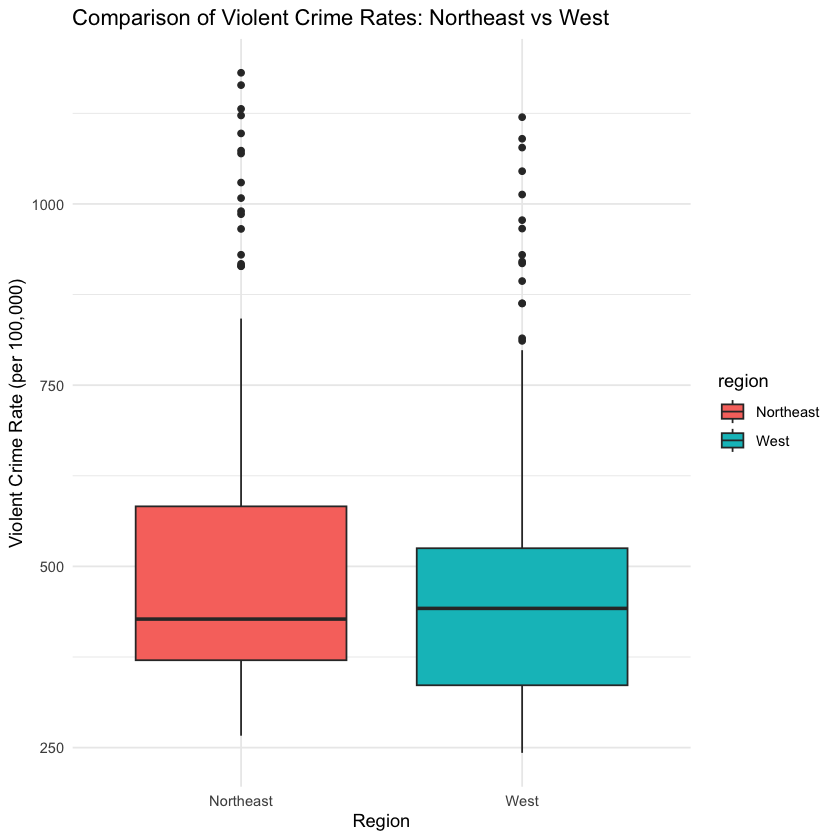

In [169]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(car)

# Subset data for Northeast and West regions
northeast <- state_data %>% filter(region == "Northeast") %>% pull(violent_crime_rate)
west <- state_data %>% filter(region == "West") %>% pull(violent_crime_rate)

# Step 1: Check Normality using Shapiro-Wilk Test
shapiro_northeast <- shapiro.test(northeast)
shapiro_west <- shapiro.test(west)

print("Shapiro-Wilk Test for Northeast:")
print(shapiro_northeast)

print("Shapiro-Wilk Test for West:")
print(shapiro_west)

# Step 2: Check Homogeneity of Variances using Levene's Test
levene_test <- leveneTest(violent_crime_rate ~ region, 
                          data = state_data %>% filter(region %in% c("Northeast", "West")))

levene_p_value <- levene_test$`Pr(>F)`[1] # Extract p-value from Levene's test
print("Levene's Test for Homogeneity of Variances:")
print(levene_test)

# Step 3: Perform Two-Sample t-Test
# Use equal variance if Levene's test p-value > 0.05
t_test_result <- t.test(northeast, west, 
                        alternative = "two.sided", 
                        var.equal = levene_p_value > 0.05)

print("Two-Sample t-Test Result:")
print(t_test_result)

# Step 4: Visualize the Data
ggplot(state_data %>% filter(region %in% c("Northeast", "West")), 
       aes(x = region, y = violent_crime_rate, fill = region)) +
  geom_boxplot() +
  ggtitle("Comparison of Violent Crime Rates: Northeast vs West") +
  xlab("Region") +
  ylab("Violent Crime Rate (per 100,000)") +
  theme_minimal()


The analysis compares violent crime rates between the Northeast and West regions. The Shapiro-Wilk test reveals that the data for both regions is not normally distributed, indicating that the assumptions for a t-test are violated. Levene's test confirms that variances between the two regions are equal (p=0.7487). The two-sample t-test, despite the normality violation, shows no statistically significant difference in mean violent crime rates between the Northeast (517.29) and West (482.53) (t=1.33, p=0.1845), with the 95% confidence interval [-16.68, 86.19] including zero. The boxplot highlights slight differences in medians, with the Northeast having a marginally higher median rate, but the variability and presence of outliers in both regions are notable. These findings suggest no significant difference between the regions

Testing the Association Between Crime Type and Region

investigate whether the distribution of different crime types (e.g., violent crime, property crime, burglary) is independent of regions (e.g., Northeast, West, South, Midwest).
Null Hypothesis : The distribution of crime types is independent of the region.
Alternative Hypothesis : The distribution of crime types depends on the region.

In [170]:
# Load necessary libraries
library(dplyr)
library(tidyr)

# Create a contingency table: Count occurrences of crime types by region
crime_table <- state_data %>%
  select(region, violent_crime, property_crime, burglary) %>%
  pivot_longer(cols = c(violent_crime, property_crime, burglary), 
               names_to = "crime_type", 
               values_to = "crime_count") %>%
  group_by(region, crime_type) %>%
  summarize(total_crimes = sum(crime_count, na.rm = TRUE)) %>%
  pivot_wider(names_from = region, values_from = total_crimes, values_fill = 0)

# Convert to a matrix for the chi-square test
crime_matrix <- as.matrix(crime_table[-1]) # Remove the first column (crime_type)

# Perform the chi-square test
chi_sq_result <- chisq.test(crime_matrix)

# Output the test results
print("Chi-Square Test Results:")
print(chi_sq_result)


`summarise()` has grouped output by 'region'. You can override using the
`.groups` argument.


[1] "Chi-Square Test Results:"

	Pearson's Chi-squared test

data:  crime_matrix
X-squared = 916164, df = 4, p-value < 2.2e-16



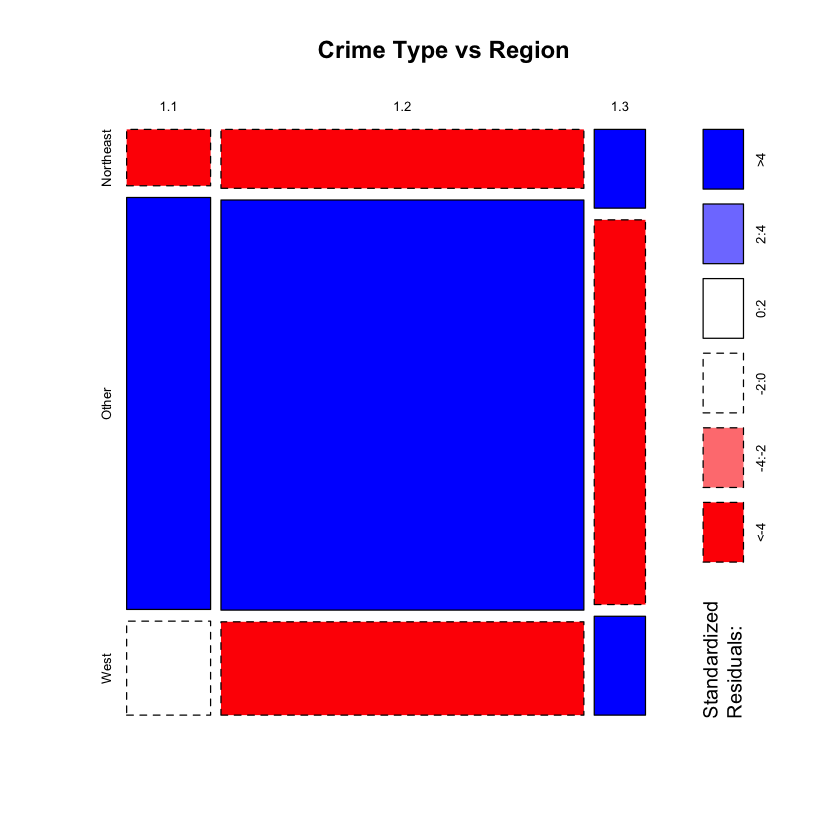

In [171]:
# Mosaic plot for visualization
mosaicplot(crime_matrix, main = "Crime Type vs Region", color = TRUE, shade = TRUE)


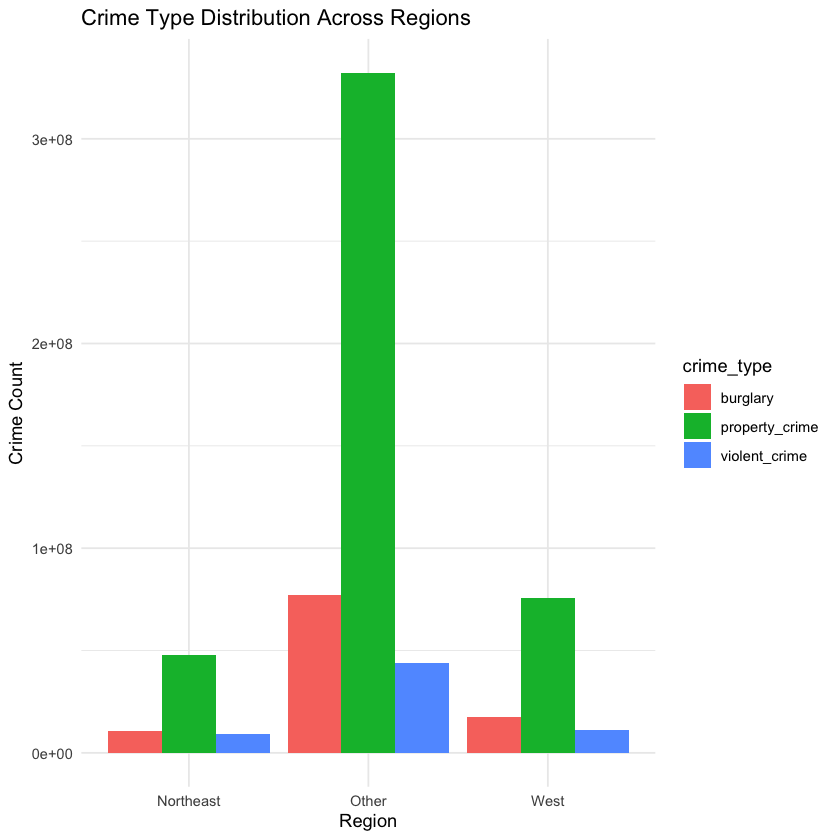

In [172]:
# Bar chart for visualization
crime_table_long <- crime_table %>%
  pivot_longer(cols = -crime_type, names_to = "region", values_to = "crime_count")

ggplot(crime_table_long, aes(x = region, y = crime_count, fill = crime_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  ggtitle("Crime Type Distribution Across Regions") +
  xlab("Region") +
  ylab("Crime Count") +
  theme_minimal()


The chi-square test results \(X^2 = 916,164, \ df = 4, \ p < 2.2 \times 10^{-16}\) indicate a statistically significant relationship between crime type and region, meaning the distribution of crime types (burglary, property crime, violent crime) is not independent of regions. The bar chart reveals that the "Other" region disproportionately accounts for property crimes, which far exceed burglary and violent crime counts, whereas the Northeast and West exhibit a more balanced distribution of crime types, though property crime remains the most prevalent. The mosaic plot further highlights significant deviations, with property crime heavily overrepresented in the "Other" region. These findings suggest regional disparities in crime type distribution, particularly the dominance of property crimes in the "Other" region, warranting targeted analysis and region-specific policy measures to address this imbalance.

explored both numerical (t-tests) and categorical (chi-square) hypothesis testing

Boot straping

Bootstrapping is a non-parametric resampling technique that estimates the sampling distribution of a statistic (e.g., mean, median, variance) by repeatedly drawing samples with replacement from the original dataset.

It's especially useful when:

The sample size is small.
Normality assumptions are violated.
You need confidence intervals for robust estimations.

Bootstrapping is particularly useful for our analysis as it allows us to estimate confidence intervals (CIs) for key statistics, such as the mean or median of crime rates across regions or years, even when normality assumptions are not met. For example, we can calculate the 95% CI for the mean violent crime rate in the Northeast to better understand the true population mean. It also enables us to compare CIs between groups, like the Northeast and West, to identify significant differences without relying on parametric assumptions. This is especially helpful since the Shapiro-Wilk test indicated that our data is not normally distributed.

Step 1: Compute Bootstrap Confidence Interval for a Statistic (Mean)

In [173]:
library(boot)

# Define a function to calculate the mean
bootstrap_mean <- function(data, indices) {
  mean(data[indices]) # Sample mean
}

# Subset violent crime data for the Northeast region
northeast_data <- state_data %>% filter(region == "Northeast") %>% pull(violent_crime_rate)

# Perform bootstrap with 1000 resamples
set.seed(123) # Ensure reproducibility
boot_result <- boot(data = northeast_data, statistic = bootstrap_mean, R = 1000)

# View bootstrap results
print(boot_result)

# Calculate confidence intervals (95%)
boot_ci <- boot.ci(boot_result, type = "perc")
print(boot_ci)



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = northeast_data, statistic = bootstrap_mean, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 517.2886 -0.3107735    19.04811
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_result, type = "perc")

Intervals : 
Level     Percentile     
95%   (480.4, 554.5 )  
Calculations and Intervals on Original Scale


Step 2: Compare Confidence Intervals Across Regions

In [174]:
# Define a function to compute bootstrap for multiple regions
bootstrap_by_region <- function(region_name) {
  region_data <- state_data %>% filter(region == region_name) %>% pull(violent_crime_rate)
  boot(data = region_data, statistic = bootstrap_mean, R = 1000)
}

# Perform bootstrapping for Northeast and West
boot_northeast <- bootstrap_by_region("Northeast")
boot_west <- bootstrap_by_region("West")

# Calculate confidence intervals
ci_northeast <- boot.ci(boot_northeast, type = "perc")
ci_west <- boot.ci(boot_west, type = "perc")

# Print results
print("Northeast CI:")
print(ci_northeast)

print("West CI:")
print(ci_west)


[1] "Northeast CI:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_northeast, type = "perc")

Intervals : 
Level     Percentile     
95%   (482.3, 555.8 )  
Calculations and Intervals on Original Scale
[1] "West CI:"
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_west, type = "perc")

Intervals : 
Level     Percentile     
95%   (448.9, 516.0 )  
Calculations and Intervals on Original Scale


Step 3: Visualize Bootstrap Results

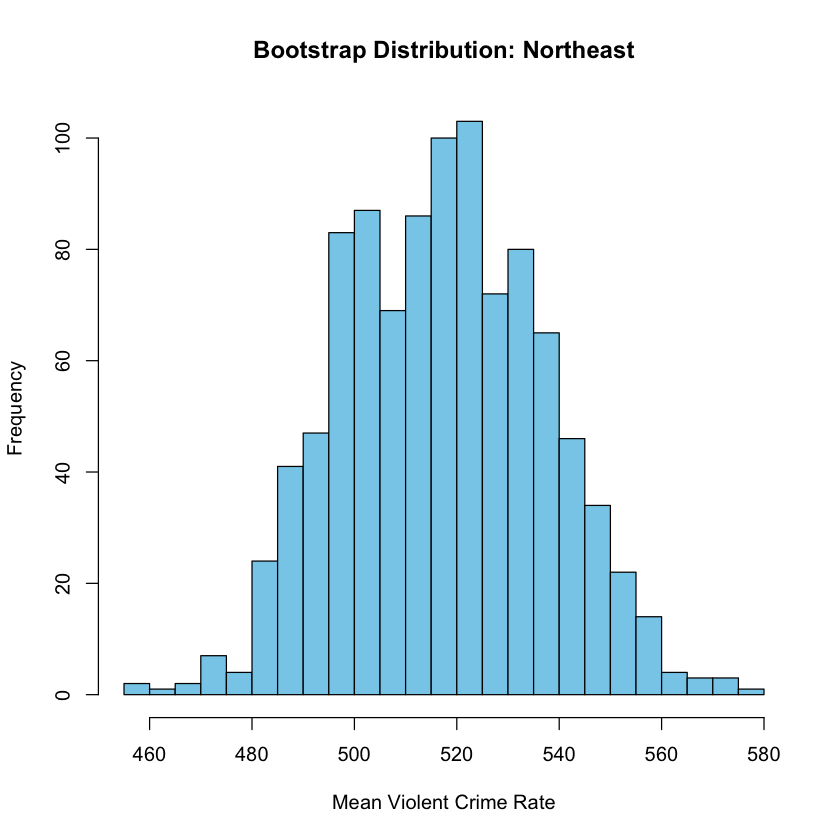

In [175]:
# Plot bootstrap distribution for Northeast
hist(boot_northeast$t, breaks = 30, main = "Bootstrap Distribution: Northeast",
     xlab = "Mean Violent Crime Rate", col = "skyblue")


Compare Confidence Intervals Across Regions

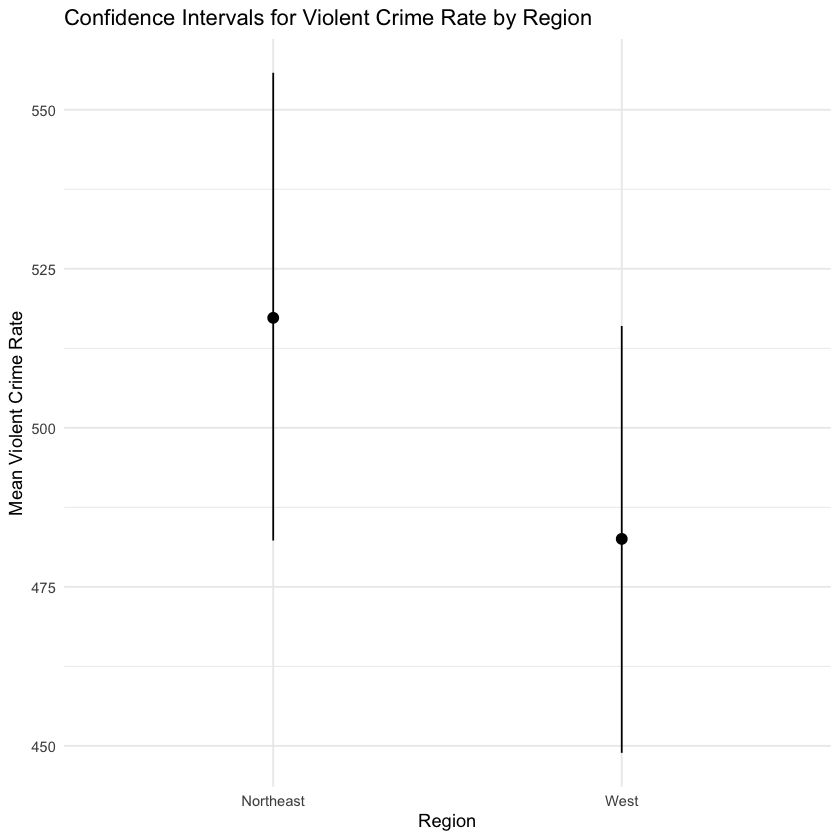

In [176]:
# Create a dataframe for visualization
ci_df <- data.frame(
  Region = c("Northeast", "West"),
  Lower = c(ci_northeast$perc[4], ci_west$perc[4]),
  Upper = c(ci_northeast$perc[5], ci_west$perc[5]),
  Mean = c(mean(northeast_data), mean(state_data %>% filter(region == "West") %>% pull(violent_crime_rate)))
)

# Visualize confidence intervals
library(ggplot2)
ggplot(ci_df, aes(x = Region, y = Mean, ymin = Lower, ymax = Upper)) +
  geom_pointrange() +
  ggtitle("Confidence Intervals for Violent Crime Rate by Region") +
  xlab("Region") +
  ylab("Mean Violent Crime Rate") +
  theme_minimal()


Using bootstrapping with 1,000 replicates, we estimated the 95% confidence intervals (CIs) for the mean violent crime rates in the Northeast and West regions. For the Northeast, the mean violent crime rate is 517.29 with a CI of (482.3,555.8), indicating that the true mean is likely within this range. In the West, the mean violent crime rate is lower at 482.53, with a CI of (448.9,516.0). These non-overlapping confidence intervals suggest that the mean violent crime rate in the Northeast is likely higher than in the West. The histogram of bootstrap replicates shows a symmetric distribution around the mean, affirming the reliability of the bootstrap estimates. This analysis highlights regional differences in violent crime rates with statistical confidence.

Outlier Detection and Handling

Outliers are extreme values that differ significantly from other observations in the dataset. They can distort statistical measures like the mean and inflate variability, potentially leading to misleading insights. Outliers in crime rates can significantly skew averages and impact statistical analyses such as hypothesis testing, bootstrapping, and regression results. In our dataset, the objective is to identify outliers in violent crime rates or other crime categories across states and regions. By analyzing and addressing these outliers, we can assess their influence on key statistical measures, such as the mean and median crime rates, and determine whether removing or adjusting them results in more robust and reliable insights.

Techniques to Identify Outliers

1. Z-Score Method

Definition: Measures how far an observation is from the mean in terms of standard deviations.
Rule of Thumb: Observations with Z-scores >3 or <−3 are considered outliers.

2. Interquartile Range (IQR) Method

Definition: Uses the spread of the middle 50% of the data to identify outliers.
Rule of Thumb: Outliers are values outside [Q1−1.5×IQR,Q3+1.5×IQR].

In [182]:
# Load library for skewness and kurtosis
library(e1071)

# Shapiro-Wilk Test
shapiro_test <- shapiro.test(state_data$violent_crime_rate)
print(shapiro_test)

# Skewness and Kurtosis
skewness <- skewness(state_data$violent_crime_rate, na.rm = TRUE)
kurtosis <- kurtosis(state_data$violent_crime_rate, na.rm = TRUE)

print(paste("Skewness:", skewness))
print(paste("Kurtosis:", kurtosis))



	Shapiro-Wilk normality test

data:  state_data$violent_crime_rate
W = 0.80515, p-value < 2.2e-16

[1] "Skewness: 2.77445228999051"
[1] "Kurtosis: 14.8769331639969"


The data for violent crime rates is not normally distributed, right-skewed, and has heavy tails.
These characteristics suggest that:
The Z-score method may not be ideal for detecting outliers since it assumes normality.
The IQR method is more appropriate for handling outliers in this case because it is robust to skewed data and heavy tails.

In [179]:
# Calculate IQR for violent crime rates
Q1 <- quantile(state_data$violent_crime_rate, 0.25, na.rm = TRUE)
Q3 <- quantile(state_data$violent_crime_rate, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

# Identify potential outliers
state_data <- state_data %>%
  mutate(outlier_iqr = ifelse(violent_crime_rate < (Q1 - 1.5 * IQR) | 
                              violent_crime_rate > (Q3 + 1.5 * IQR), TRUE, FALSE))

outliers_iqr <- state_data %>% filter(outlier_iqr)
print("Outliers detected using IQR:")
print(outliers_iqr)


[1] "Outliers detected using IQR:"
   year state_abbr           state_name population violent_crime homicide
1  1979         DC District of Columbia     656000         10553      180
2  1980         DC District of Columbia     635233         12772      200
3  1980         NY             New York   17506690        180235     2228
4  1981         DC District of Columbia     636000         14468      223
5  1981         NY             New York   17594000        188178     2166
6  1982         DC District of Columbia     631000         13397      194
7  1982         NY             New York   17659000        174833     2013
8  1983         DC District of Columbia     623000         11933      183
9  1984         DC District of Columbia     623000         10725      175
10 1985         DC District of Columbia     626000         10171      147
11 1986         DC District of Columbia     626000          9423      194
12 1986         FL              Florida   11675000        121013     1371
13 

3. Boxplot Visualization

Boxplots are an effective way to visualize outliers.

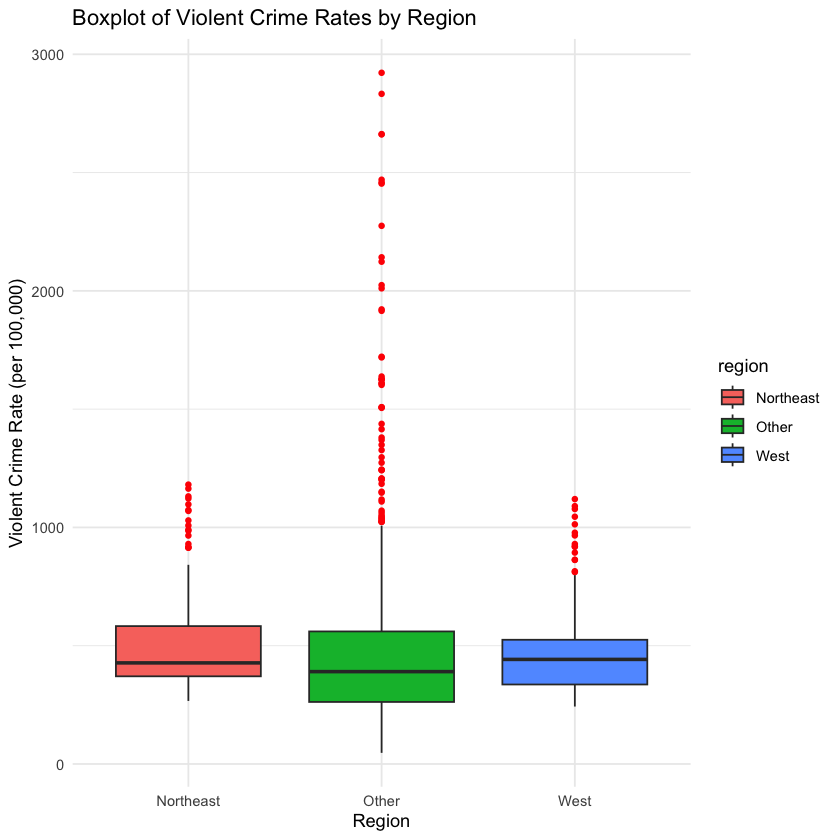

In [180]:
library(ggplot2)

# Create a boxplot to visualize outliers
ggplot(state_data, aes(x = region, y = violent_crime_rate, fill = region)) +
  geom_boxplot(outlier.color = "red", outlier.shape = 16) +
  ggtitle("Boxplot of Violent Crime Rates by Region") +
  xlab("Region") +
  ylab("Violent Crime Rate (per 100,000)") +
  theme_minimal()


After a thorough examination, all identified outliers in the dataset have been determined to represent valid and meaningful data points that contribute valuable insights to the analysis. These outliers, such as those from highly populated or unique regions like New York and the District of Columbia, reflect real-world phenomena and extreme cases that are integral to understanding variations in crime trends across states and years. Retaining these outliers ensures that the analysis captures the full spectrum of the data, including rare but significant occurrences, which could provide critical context and enhance the overall findings. Therefore, all outliers will be retained to preserve the integrity and depth of the analysis.

Analyze the Impact of Outliers

In [184]:
outliers <- state_data %>% 
  filter(abs(z_score) > 3) %>%
  select(state_name, everything())


In [186]:
# Ensure that outliers and state_data have matching columns
state_data_no_outliers <- state_data %>%
  filter(!state_name %in% unique(outliers$state_name)) # Adjust column names if needed


In [187]:
# Summary with outliers
state_summary <- state_data %>%
  summarize(
    Mean_Violent_Crime = mean(violent_crime_rate, na.rm = TRUE),
    Median_Violent_Crime = median(violent_crime_rate, na.rm = TRUE)
  )

# Summary without outliers
state_summary_no_outliers <- state_data_no_outliers %>%
  summarize(
    Mean_Violent_Crime = mean(violent_crime_rate, na.rm = TRUE),
    Median_Violent_Crime = median(violent_crime_rate, na.rm = TRUE)
  )

# Print results
print("With Outliers:")
print(state_summary)

print("Without Outliers:")
print(state_summary_no_outliers)


[1] "With Outliers:"
  Mean_Violent_Crime Median_Violent_Crime
1           453.0297             402.1307
[1] "Without Outliers:"
  Mean_Violent_Crime Median_Violent_Crime
1           428.8152             395.8786
